In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kerastuner as kt

2024-06-25 20:06:02.705127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 20:06:02.705260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 20:06:02.828903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_34/2516169643.py:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# In DL (unlike traditional ML), we don't necessarily need to drop features with low correlation to the target variable because neural networks can learn complex patterns and relationships.
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [9]:
X = df.iloc[:, :8]
y = df.iloc[:, -1]

X = df.iloc[:, :8].values
y = df.iloc[:, -1].values

# The first one retains all the methods and properties associated with Pandas DataFrame and Series, such as indexing, selecting columns, and various DataFrame methods. Whereas, the second one converts them into simple numpy arrays. Both options are compatible with the modern ML and DL libraries.

In [10]:
# X.head() -> would not work as X contains a numpy array instead of a pandas dataframe

X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

array([[-0.54791859, -1.15469351, -3.57259724, ..., -4.06047387,
        -0.50700636, -1.04154944],
       [ 1.53084665, -0.27837344,  0.66661825, ..., -0.48135115,
         2.44666971,  1.4259954 ],
       [-0.84488505,  0.56664949, -1.19450074, ..., -0.41789153,
         0.55003518, -0.95646168],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

In [14]:
X_test

array([[ 0.63994726, -0.71653347, -0.57412775, ...,  0.25478047,
        -0.1264714 ,  0.83038113],
       [-0.54791859, -0.27837344,  0.304734  , ...,  0.47054319,
        -0.97814487, -1.04154944],
       [-0.54791859, -0.40356202, -0.26394125, ..., -0.15136112,
        -0.94794368, -1.04154944],
       ...,
       [ 1.23388019, -0.81042491,  0.14964075, ...,  0.61015436,
         0.03963513,  2.02160968],
       [-0.54791859,  0.7857295 ,  0.04624525, ..., -0.506735  ,
        -0.40734244, -0.36084741],
       [ 1.23388019, -1.46766496,  0.04624525, ...,  0.41977549,
         0.70406123,  0.49003012]])

In [15]:
"""
Research has demonstrated that ReLU is the most effective activation function for hidden layers, 
while Adam is the best optimizer, consistently delivering strong performance in most cases.
However, i'm still applying hyperparameter tuning to both of them for the sake of learning.

I also applied hyperparameter tuning for dropout ratio as my neural network was overfitting.
"""

"\nResearch has demonstrated that ReLU is the most effective activation function for hidden layers, \nwhile Adam is the best optimizer, consistently delivering strong performance in most cases.\nHowever, i'm still applying hyperparameter tuning to both of them for the sake of learning.\n\nI also applied hyperparameter tuning for dropout ratio as my neural network was overfitting.\n"

In [16]:
# Here, hp means hyperparameter object
def build_model(hp):
  counter = 0
  model = Sequential()

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    if counter == 0:
      model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=8), activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid']), input_dim=8))
      model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
    else:
      model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=8), activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid'])))
      model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
    counter+=1

  model.add(Dense(units=1, activation='sigmoid'))

  model.compile(optimizer=hp.Choice('optimizer_' + str(i), values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [17]:
tuner = kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=3 ,
                     directory='my_dir',
                     project_name='Pima - ANN')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 05s]
val_accuracy: 0.8116883039474487

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 44s


In [19]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units_0': 16,
 'activation_0': 'tanh',
 'dropout_0': 0.4,
 'optimizer_0': 'rmsprop',
 'units_1': 88,
 'activation_1': 'tanh',
 'dropout_1': 0.8,
 'units_2': 104,
 'activation_2': 'sigmoid',
 'dropout_2': 0.5,
 'units_3': 128,
 'activation_3': 'sigmoid',
 'dropout_3': 0.7,
 'optimizer_3': 'adam',
 'units_4': 96,
 'activation_4': 'tanh',
 'dropout_4': 0.7,
 'units_5': 48,
 'activation_5': 'relu',
 'dropout_5': 0.7,
 'units_6': 16,
 'activation_6': 'tanh',
 'dropout_6': 0.2,
 'units_7': 112,
 'activation_7': 'relu',
 'dropout_7': 0.6,
 'optimizer_7': 'adam'}

In [20]:
tuner.results_summary()

Results summary
Results in my_dir/Pima - ANN
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 1
units_0: 16
activation_0: tanh
dropout_0: 0.4
optimizer_0: rmsprop
units_1: 88
activation_1: tanh
dropout_1: 0.8
units_2: 104
activation_2: sigmoid
dropout_2: 0.5
units_3: 128
activation_3: sigmoid
dropout_3: 0.7
optimizer_3: adam
units_4: 96
activation_4: tanh
dropout_4: 0.7
units_5: 48
activation_5: relu
dropout_5: 0.7
units_6: 16
activation_6: tanh
dropout_6: 0.2
units_7: 112
activation_7: relu
dropout_7: 0.6
optimizer_7: adam
Score: 0.8116883039474487

Trial 0 summary
Hyperparameters:
num_layers: 4
units_0: 128
activation_0: tanh
dropout_0: 0.8
optimizer_0: nadam
units_1: 8
activation_1: relu
dropout_1: 0.1
units_2: 8
activation_2: relu
dropout_2: 0.1
units_3: 8
activation_3: relu
dropout_3: 0.1
optimizer_3: rmsprop
Score: 0.7337662577629089

Trial 1 summary
Hyperparameters:
num_layers: 8
units_0: 8
activation_0: sigmoid

In [21]:
model = tuner.get_best_models(num_models=1)[0]

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
# i will also be applying early stopping simultaneously - in order to determine the appropriate number of epochs
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [23]:
history = model.fit(X_train, y_train, epochs=1500, initial_epoch=5, validation_data=(X_test, y_test), callbacks=callback)

Epoch 6/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6440 - loss: 0.6425 - val_accuracy: 0.8117 - val_loss: 0.5148
Epoch 7/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7084 - loss: 0.5749 - val_accuracy: 0.8117 - val_loss: 0.5004
Epoch 8/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.5824 - val_accuracy: 0.8182 - val_loss: 0.4897
Epoch 9/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.5245 - val_accuracy: 0.7987 - val_loss: 0.4807
Epoch 10/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.5449 - val_accuracy: 0.7987 - val_loss: 0.4751
Epoch 11/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.5368 - val_accuracy: 0.7857 - val_loss: 0.4711
Epoch 12/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5203 - val_accuracy: 0.7727 - val_loss: 0.4686
Epoch 13/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7299 - loss: 0.5177 - val_accurac

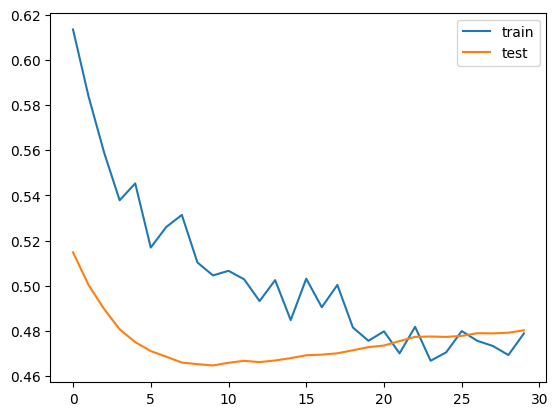

In [24]:
# training loss VS. validation (testing) loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [25]:
# Compiling vs Training
"""
Compiling configures how a neural network learns by setting up optimizer, loss function, and metrics.
Training is the actual process of feeding data to the network, adjusting its parameters to minimize the loss, and improving its performance iteratively.
"""

'\nCompiling configures how a neural network learns by setting up optimizer, loss function, and metrics.\nTraining is the actual process of feeding data to the network, adjusting its parameters to minimize the loss, and improving its performance iteratively.\n'

In [26]:
# Making the predictions and evaluating the model
# Predicting the Test set results

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


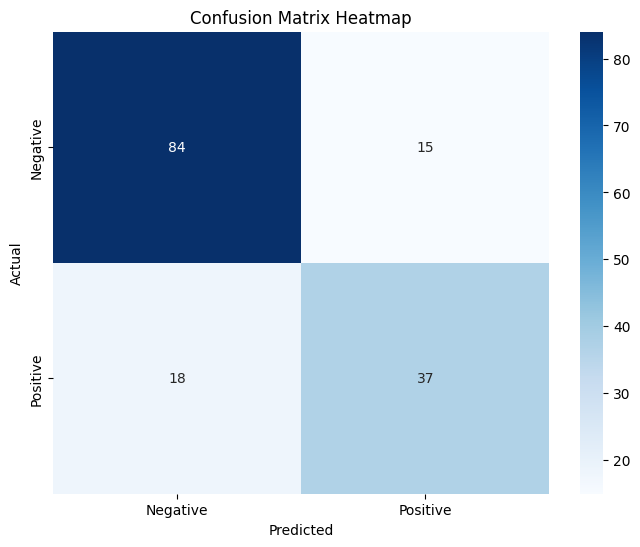

In [27]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [28]:
# Calculate the Accuracy (w.r.t testing data)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

print(f"The accuracy of the model is: {score}")

The accuracy of the model is: 0.7857142857142857


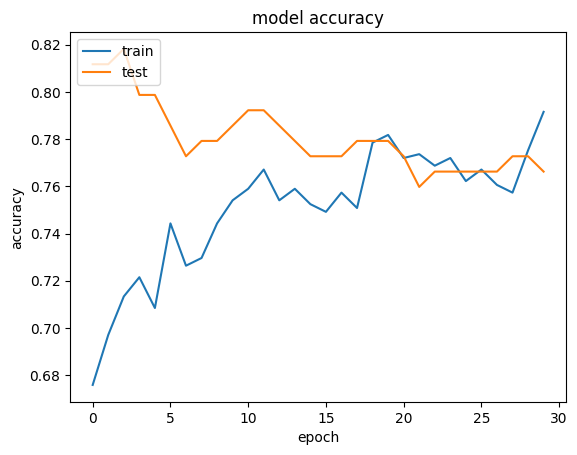

In [29]:
# summarizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()